In [1]:
import sys
import pandas as pd
sys.path.append('D:/research/jokesclustering/') # ваш путь до корня проекта
from components_simple_norm import SimpleNormVectorizer
from components import KmeansSimpleClusterExtractor
from vector_clustering.abstract.model import Model
from vector_clustering.data.manager import get_jokes_as_dataframe, load_pandas_csv, load, ARANEUM_FASTTEXT
from sklearn.cluster import KMeans

C:\Users\PC\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
jokes = get_jokes_as_dataframe()
jokes.head()

,joke_text
0,"Мужчину трудно задеть за живое, но уж если зад..."
1,В нашем кемпинге строго запрещено людям разног...
2,А как хорошо у девушек начинается: любимый: ми...
3,"Одна белка случайно попробовала пиво и поняла,..."
4,ОБЪЯВЛЕНИЕ На время мирового финансового кризи...


In [3]:
vectorizer = SimpleNormVectorizer(ARANEUM_FASTTEXT)
kmeans_model = KMeans(n_clusters=50, random_state=42)
cluster_extractor = KmeansSimpleClusterExtractor(kmeans_model)

In [4]:
model = Model(vectorizer, cluster_extractor)

In [5]:
texts = jokes.joke_text.values

In [6]:
demo = model.fit(texts)

vectorizer is fitted
clustering model is fitted


In [9]:
knn = model.get_model()

In [25]:
jokes['cluster_id'] = knn.labels_

In [13]:
from collections import Counter
import numpy as np
counts = [v for k, v in Counter(knn.labels_).items()]

In [14]:
np.mean(counts), np.min(counts), np.max(counts), np.median(counts)

(2715.98, 236, 5287, 2464.5)

In [19]:
from gensim.utils import simple_preprocess
from rnnmorph.predictor import RNNMorphPredictor
predictor = RNNMorphPredictor(language="ru")

def nouns_in_joke(joke):
    words = simple_preprocess(joke, max_len=1000000)
    forms = predictor.predict(words)
    return [words[i] for i in range(len(words)) if forms[i].pos == 'NOUN']

def cluster_nouns(cluster_id):
    sub = jokes[jokes.cluster_id == cluster_id].joke_text.values
    sub = [nouns_in_joke(x) for x in sub]
    res = set()
    for x in sub:
        res.update(x)
    return np.array(list(res))

In [22]:
fasttext_wrapper = load(ARANEUM_FASTTEXT)

In [26]:
from sklearn.metrics.pairwise import euclidean_distances

def cluster_top_based_on_equclidian_distance(cluster_id, top=15):
    centroid_vector = knn.cluster_centers_[cluster_id]
    nouns = cluster_nouns(cluster_id)
    
    vectores = []
    words = []
    for noun in nouns:
        try:
            vectores.append(fasttext_wrapper[noun])
            words.append(noun)
        except KeyError as e:
            pass
        
    vectores = np.array(vectores)
    nouns = np.array(words)
    
    distances = euclidean_distances(vectores, [centroid_vector])
    distances_idx = np.argsort(np.ravel(distances))
    min_dist_top = distances_idx[:top]
    words = nouns[min_dist_top]
    return '\n'.join(words)

In [27]:
for c in range(50):
    print(c)
    print(cluster_top_based_on_equclidian_distance(c))
    print()

0


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


дураками
настеньку
дураком
девоньки
печеньками
господина
шуточками
старика
покойника
глупостей
старикашке
сволочи
гадости
виселька
помордас

1


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


александровича
петросяна
макаревичу
жириновского
смирнову
петровичу
милевского
виктором
слоников
макаревича
генералиссимусом
самозванцев
москалей
жириновскому
малиновке

2


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


неосмотрительности
навального
политкорректности
женоненавистники
бездельники
предатели
уговариват
однокласниках
соображений
бездельников
жириновского
старости
презервативы
одиночестве
проститутками

3


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


господина
господином
господу
несправедливостей
дьяволопоклонник
предатели
благословением
старости
императором
господом
девственницам
милонове
грешники
праведником
наставники

4


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


холостяка
непристойности
любовником
подкаблучника
любовнице
любовнику
невесту
холостяком
любовника
истерики
невесты
блондинкой
невестой
старика
хреновена

5


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


товарищами
одноклассником
терминатором
антилохотрон
модератора
одноклассниках
проститутками
джентельмена
терминатора
одноклассники
инопланетянина
малолетками
жириновскому
оператором
приколистка

6


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


воскресеньем
понедельником
воскресенье
деньрожденьем
понедельника
воскресенья
белобилетники
понедельников
пятницасубботавоскресенье
воскресений
просрала
мандаринки
половины
напарником
старости

7


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


настенькой
коровок
вороно
коньками
настеньки
настеньке
мороженого
крокодила
поросенка
черевички
ласточек
теремочком
медвежонка
стариком
сороконожки

8


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


сексопатологу
сексопатолога
невропатолога
целительнице
истерики
больного
оталаринголога
оталаринголог
ветеринаром
патологоанатома
одноклассницами
провизора
старости
онанистом
головогружение

9


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


господином
перепутатькто
господину
старости
девственницами
насильником
мордоворотом
несправедливости
любовником
невесту
стариком
подсрачники
старика
благоразумием
старики

10


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


госпереворота
соплеменников
пристава
остервенением
серебренникову
скандалиста
павленского
напарником
петровны
коллаборационисты
поляками
предатели
каратели
полисменов
господина

11


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


приколисты
натуралиста
трактористы
терминатора
каратистом
передовики
разворотом
пограничниками
напильником
половинку
товарищами
шароварах
молотками
космополитена
протектором

12


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


старики
стариками
бездельнике
истерики
невесты
старику
девственницами
невесту
гадостей
покойника
холостяка
невестки
стариканом
папенькой
старика

13


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


жириновского
толковательнице
бездельников
градоначальником
григорьевича
головорезов
навального
предателей
генералиссимуса
степановиче
петровича
станиславского
ходорковского
наперсточников
макаревича

14


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


придурковатость
соплеменники
справедливости
неприкосновенности
недогадливостью
бездельника
парадоксом
недоразумению
противоположности
непониманием
странностей
невнимательности
искренности
соображений
навального

15


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


пастернака
половины
половине
одноклассницами
аликманкишиоглыбердыкилимандыбатырбекову
семерок
пристанями
рабиновичей
парасотенонеры
перестукину
четверти
воскресенье
анатольича
магнитогорска
недельки

16


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


скороговоркам
скороговоркой
презервативы
долгожительству
центробанком
центробанка
центробанку
поличным
фальшивомонетчики
кремлеботы
рабиновича
рабиновичем
проституток
товарищем
просрали

17


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


мерзавцами
старикана
хваннадальсхнукюр
жириновского
укрокарателей
подворотнями
градоначальником
императором
матроску
патриотками
девственницами
константина
американскихгорок
навального
голодомора

18


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


винегретом
фрикадельками
котлеточками
приколисты
поллитрами
вареного
черносливом
креветками
пельменьками
зельеваренье
поросенка
морковки
поросёночек
подносом
сковороде

19


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


доченькой
перфекционистом
неприятности
неприятностей
приктически
подзатыльником
смелости
больного
невестой
холостяка
параноиках
справедливости
навальному
удовольствием
недостатки

20


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


содомадонасьена
мистера
истерики
знаменитостей
сильвупле
робертом
инопланетянина
старика
американцами
баронессы
старики
квентина
парадами
мерзавцами
знаменитости

21


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


политкорректности
сообразительностью
естественности
предостережения
признательности
неконкурентноспособность
презервативы
презервативов
недостатками
абракобамбрашвабрмаафроамериканбраштатыроссияфрэндшипфорэвэмбра
неприкосновенности
придурковатость
самостоятельности
целесообразности
растрату

22


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


терминатора
автопроизводителей
видеорегистратора
автопроизводители
операторами
разводителем
внедорожником
презервативов
администраторами
производителей
плевательницами
владивостока
послестаграмм
презервативы
программистов

23


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


жириновского
жириновскому
навального
ходорковского
диктатором
предатели
кремлеботам
господина
простофили
ходорковскому
бандерлогов
единоросса
товарищами
медведеву
очернительства

24


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


возлюбленного
любовники
невестами
невесты
любовником
любовнику
невесту
любовнице
одноклассницах
невест
свекровью
женатого
собутыльником
истерики
старика

25


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


старики
девоньки
калиночка
девками
коньками
пидорасом
сволочи
мистером
комарики
пастуха
братела
истерики
дураком
настеньке
валенках

26


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


стариками
большезадомшевелин
девственниками
чивирзднеркильмаскишбрунгальдмерк
потрошительница
приятельнице
настенькина
скороговорки
старики
настеньке
джентельмена
братуууха
товарищами
старости
мороженого

27


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


навального
решительноенаступление
жириновского
издевательства
плевательницу
икомуятоконидавала
жириновскому
господина
истерику
предатели
пристава
перепуточки
бандерлогам
наперсточниками
перепугу

28


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


владивостока
градоначальники
жириновского
пономареву
полонского
владивостоке
интернационалистов
трактористов
радзаунаримампианина
пограничники
гастробайтеров
железнодорожника
течественники
жириновскому
александровича

29


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


настенькина
астенька
старичек
настеньке
мороженого
дочками
братишку
братиком
настеньки
нихуяшеньки
старикана
девочками
леночкой
сыночком
подружки

30


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


доминошниками
трухспринтодинокрузианусфен
навального
самолтами
супернаглость
соплеменника
всёпидорасыдапидорасы
крутотень
бесцеремонности
истерики
простакам
попрошайки
воображением
жириновского
истерику

31


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


пустобрехалование
предводители
раскольниковым
проституками
справороссами
жириновского
продовольствием
пролетариату
негодованием
трактористов
политкорректности
уголовниками
издевательств
налогоплатильщиков
сторонники

32


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


настенькой
господина
невесту
одиночества
любовником
идиотом
садомахохисты
дураками
воображением
одиночестве
искушеньем
парадоксы
брезгливости
кровопийцы
истерику

33


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


воскресеньем
расказала
мистраля
подкаблучники
настеньке
потапову
гробовщику
воскресенье
воскресенья
понедельником
старости
дураками
настеньку
одноклассниками
старичку

34


C:\Users\PC\Anaconda3\lib\site-packages\rnnmorph\batch_generator.py:175: RuntimeWarning: invalid value encountered in true_divide
  gram_value_indices[index:index + len(values)] = mask / s
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


жириновского
жириновскому
парапрезидент
госсоветником
ходорковского
единороссов
президентом
справедливороссы
медведевских
президентами
президента
правительства
президенту
президентам
президентов

35


C:\Users\PC\Anaconda3\lib\site-packages\rnnmorph\batch_generator.py:175: RuntimeWarning: invalid value encountered in true_divide
  gram_value_indices[index:index + len(values)] = mask / s
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


америкосово
националистами
новороссирию
евроамериканцами
продовольствия
жириновского
сторонники
великобритании
американцами
националистов
предатели
американцам
американцев
справедливороссы
черномордина

36


C:\Users\PC\Anaconda3\lib\site-packages\rnnmorph\batch_generator.py:175: RuntimeWarning: invalid value encountered in true_divide
  gram_value_indices[index:index + len(values)] = mask / s
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


задницами
перепугу
девственницами
сволочи
соломончика
сковородкой
старикашкой
старики
москалей
бандуристом
полотенец
ботинками
сковородку
валенках
печальки

37


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


гадости
любовниками
идиотом
господючки
невесту
дураком
невесты
старости
одиночестве
настеньки
пропасти
глупости
параноиком
непетухом
глупостей

38


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


острастки
хренатень
ботинками
понаподнимали
полотенчиком
фрикадельками
истерики
холостякам
спрашиваетвы
стопарение
бестолочей
бородачем
поворотника
сковородкой
перепонками

39


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


политкорректности
остатками
навального
постороние
недостатками
самодостаточности
соображений
недоброжелатели
единорогами
подкаблучником
просторы
презервативы
непонятности
предрассудкам
заковырестей

40


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


бездельники
подворотням
разговорчики
дурачками
корочками
старики
бездельнику
навального
четвереньках
калиночка
незнакомками
сволочи
старости
сковороде
головешки

41


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


родоначальниками
тинаканделакивидение
кинематографистов
предатели
соотечественника
жириновского
предводителей
градоначальником
трактористки
пародиста
сквернословием
терминатора
неломоносова
бездельником
сценариста

42


C:\Users\PC\Anaconda3\lib\site-packages\rnnmorph\batch_generator.py:175: RuntimeWarning: invalid value encountered in true_divide
  gram_value_indices[index:index + len(values)] = mask / s
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


тарантасом
москальська
москалику
киманегрыфисты
товарищами
настенькам
гладиатором
поговорками
валенками
напарнику
навального
москаля
матроску
жириновского
пидорасами

43


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


женоненавистником
женоненавистники
пленниками
навального
стереотеливозоров
бездельники
растерянности
девственницами
поговорочки
пристрастий
подкаблучником
воображения
бессребреником
голодомора
старатели

44


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


предатели
бессовестностью
политкорректности
патернализмом
соплеменников
жириновского
справедливости
соотечественниками
госперевороте
навального
предателя
крысятничество
последователи
остервенением
сторонники

45


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


подстрекательстве
соотечественники
соотечественников
постановлению
финансистов
правительству
правительства
правительством
центризберком
правительств
константина
налогоплательщиков
правительстве
правительсьва
националистов

46


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


джентельменом
программисты
британии
однополчанина
трансформеров
программиста
приставки
матросом
дискотеке
американцы
разговорника
поклонником
скоростей
страну
интернете

47


C:\Users\PC\Anaconda3\lib\site-packages\rnnmorph\batch_generator.py:175: RuntimeWarning: invalid value encountered in true_divide
  gram_value_indices[index:index + len(values)] = mask / s
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


москалей
сидора
стариками
филиппом
петросяну
жириновского
пристава
василисе
воробышки
старика
замордовайло
петросяна
василису
анатольича
старости

48


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


сволочи
разговариваешъ
старику
непотребщину
пакости
зоренькой
жалости
старости
половинку
хреновину
настеньке
сковородкой
сковородки
перегара
проклятье

49


C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


напарника
перепугу
магнитогорска
кондуктора
бронетраспортера
пассатижами
владивостока
карманника
переспрашивания
бронетранспортером
лодители
навального
дворниками
бронежилетах
топором



In [29]:
from sklearn.model_selection import train_test_split

In [63]:
joke_part, _, labels_part, _ = train_test_split(texts, knn.labels_, train_size = 0.01, stratify=knn.labels_)
joke_part.shape

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(1357,)

In [64]:
joke_part_vectors = vectorizer.fit(joke_part)

In [67]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, metric='cosine')
xy = tsne.fit_transform(joke_part_vectors)

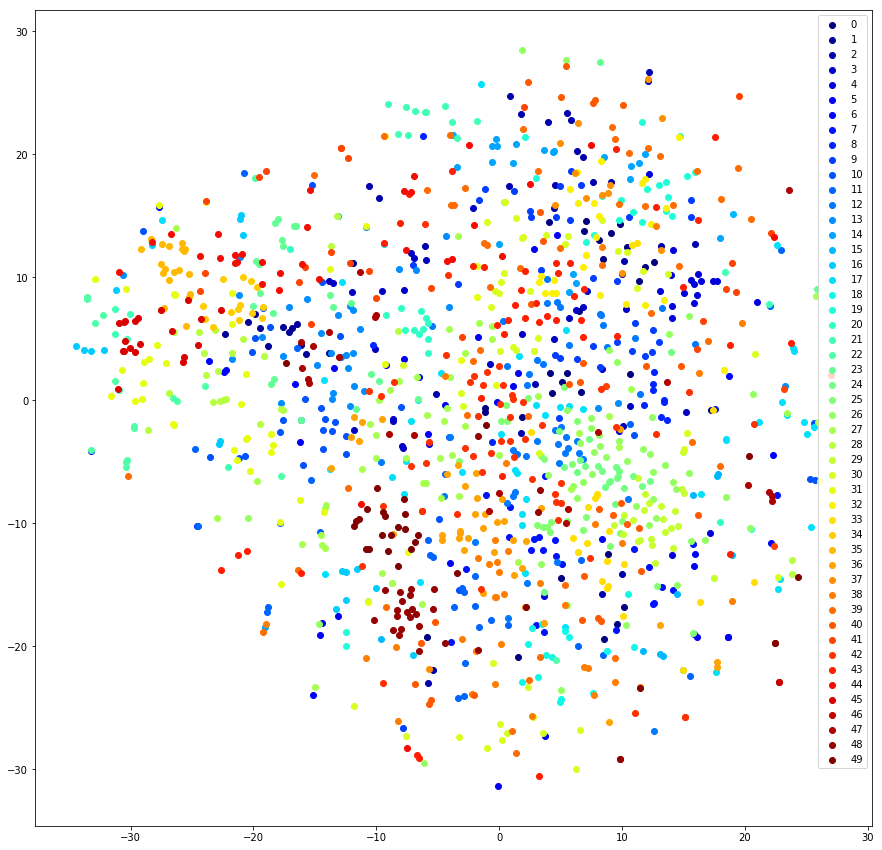

In [68]:
import matplotlib.pyplot as plt

x=xy[:, 0]
y=xy[:, 1]
classes = labels_part
unique = list(set(classes))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
plt.figure(figsize=(15, 15))
for i, u in enumerate(unique):
    xi = [x[j] for j  in range(len(x)) if classes[j] == u]
    yi = [y[j] for j  in range(len(x)) if classes[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend()

plt.show()